<a href="https://colab.research.google.com/github/Redwoods/pdm/blob/main/notebook/chap08_DNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN with karas

## mse vs. bce
- meean squared error
- binary cross-entropy

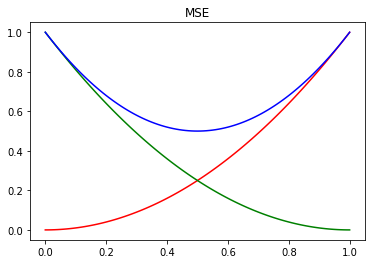

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


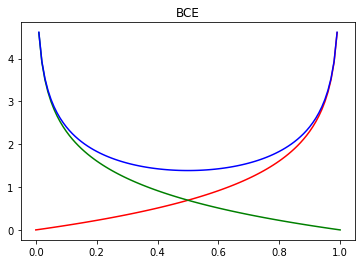

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) 
y0 = np.square(x)
y1 = np.square(1-x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('MSE')
plt.show() 

# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x)
y1 = -np.log(x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('BCE')
plt.show() 

## cross-entropy
- BinaryCrossentropy
- CategoricalCrossentropy
- SparseCategoricalCrossentropy

In [2]:
# import numpy as np
import tensorflow as tf

y_true = [  [1],   [0],   [0],   [1]]  
y_pred = [[0.9], [0.1], [0.2], [0.9]]   
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())
      
# CategoricalCrossentropy, 3 classes
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지
y_pred = [[0.1, 0.8, 0.1], [0.2, 0.1, 0.7], [0.8, 0.1, 0.1]]
cce = tf.keras.losses.CategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())   

# SparseCategoricalCrossentropy, 3 classes
y_true = [[1], [2], [0]] # 고양이, 호랑이, 강아지
y_pred = [[0.1, 0.8, 0.1], [0.2, 0.1, 0.7], [0.8, 0.1, 0.1]]
scce = tf.keras.losses.SparseCategoricalCrossentropy ()
print(scce(y_true, y_pred).numpy ())   

y_true = [ 12 , 20 , 29 , 60 ]
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())

#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )


0.13480616
0.26765403
0.26765403
9


## int encoding

In [3]:
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = labelencoder.fit_transform(X[:,0].reshape(-1,1))
print(XX)

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX.reshape(-1,1), X), axis = 1)	# X와 XX를 붙인다. 
print(X)


[2 1 0]
[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## one-hot encoding

In [4]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)

#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

y_train[:10]

y_train_one_hot = to_categorical(y_train, num_classes = 10, dtype ="int32")
y_train_one_hot.shape
y_train_one_hot[:10]


[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]
11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int32)

## Scaler
- MinMaxScaler
- StandardScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 

# StandardScaler()
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. 


[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## Normalization layer

In [6]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))

#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))


tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## IMDB 영화평 학습

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
49/49 [==============================] - 1s 13ms/step - loss: 0.5829 - accuracy: 0.7073 - val_loss: 0.4414 - val_accuracy: 0.8172
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.3720 - accuracy: 0.8456 - val_loss: 0.3454 - val_accuracy: 0.8547
Epoch 3/20
49/49 [==============================] - 0s 8ms/step - loss: 0.3211 - accuracy: 0.8658 - val_loss: 0.3311 - val_accuracy: 0.8609
Epoch 4/20
49/49 [==============================] - 0s 8ms/step - loss: 0.3070 - accuracy: 0.8732 - val_loss: 0.3289 - val_accuracy: 0.8608
Epoch 5/20
49/49 [==============================] - 0s 8ms/step - loss: 0.3002 - accuracy: 0.8751 - val_loss: 0.3300 - val_accuracy: 0.8585
Epoch 6/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2944 - accuracy: 0.8781 - val_loss: 0.3284 - val_accuracy: 0.8588
Epoch 7/20
49/49 [==============================] - 0s 7ms/step - loss: 0.2905 - accuracy: 0.8

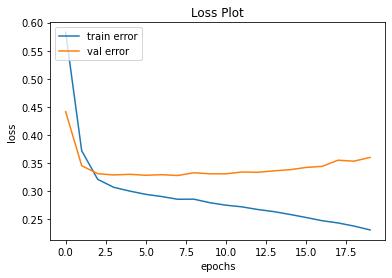

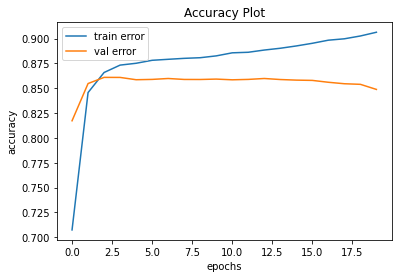

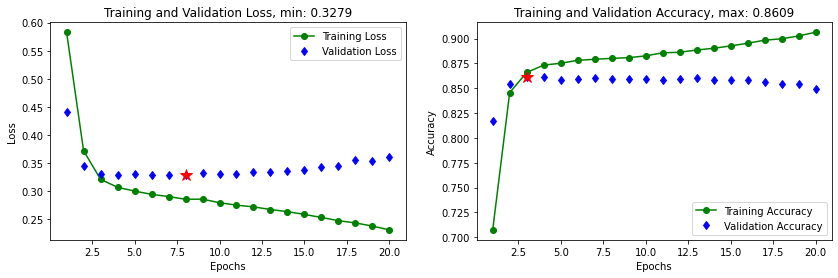

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000)
len(train_data[0]),np.unique(train_data[0]).size
max(train_data.max())
train_data.shape,train_labels.shape

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# train_data.shape,test_data.shape
# train_data[0]

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=1)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## IMDB 영화평
- L2 규제
- Dropout

Epoch 1/20
49/49 - 3s - loss: 0.6205 - accuracy: 0.7031 - val_loss: 0.4607 - val_accuracy: 0.8198 - 3s/epoch - 57ms/step
Epoch 2/20
49/49 - 1s - loss: 0.4010 - accuracy: 0.8494 - val_loss: 0.3868 - val_accuracy: 0.8540 - 681ms/epoch - 14ms/step
Epoch 3/20
49/49 - 1s - loss: 0.3583 - accuracy: 0.8686 - val_loss: 0.3701 - val_accuracy: 0.8593 - 661ms/epoch - 13ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3464 - accuracy: 0.8725 - val_loss: 0.3641 - val_accuracy: 0.8607 - 361ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3401 - accuracy: 0.8741 - val_loss: 0.3625 - val_accuracy: 0.8610 - 348ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3366 - accuracy: 0.8751 - val_loss: 0.3617 - val_accuracy: 0.8602 - 358ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3340 - accuracy: 0.8767 - val_loss: 0.3622 - val_accuracy: 0.8596 - 330ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3298 - accuracy: 0.8752 - val_loss: 0.3600 - val_accuracy: 0.8604 - 373ms/epoch - 8ms/step
Epoch 9/20
49/49

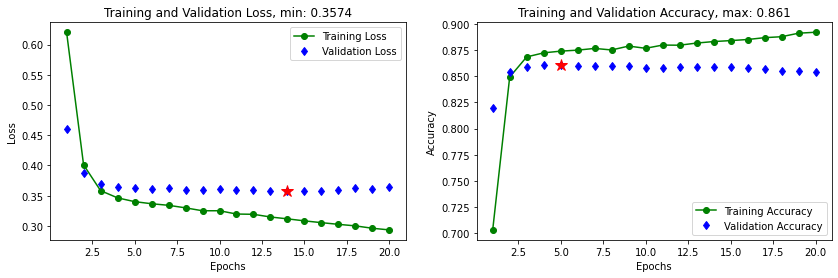

In [8]:
/
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Dropout

Epoch 1/20
49/49 - 1s - loss: 0.6760 - accuracy: 0.5614 - val_loss: 0.6145 - val_accuracy: 0.7490 - 1s/epoch - 25ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5800 - accuracy: 0.6952 - val_loss: 0.4617 - val_accuracy: 0.8225 - 376ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4879 - accuracy: 0.7760 - val_loss: 0.3850 - val_accuracy: 0.8435 - 353ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4344 - accuracy: 0.8139 - val_loss: 0.3492 - val_accuracy: 0.8536 - 382ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4061 - accuracy: 0.8310 - val_loss: 0.3342 - val_accuracy: 0.8580 - 391ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3793 - accuracy: 0.8450 - val_loss: 0.3260 - val_accuracy: 0.8598 - 403ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3635 - accuracy: 0.8530 - val_loss: 0.3222 - val_accuracy: 0.8614 - 344ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3535 - accuracy: 0.8540 - val_loss: 0.3217 - val_accuracy: 0.8612 - 375ms/epoch - 8ms/step
Epoch 9/20
49/49 -

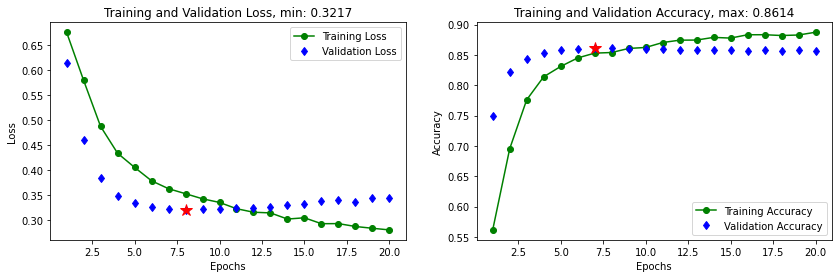

In [9]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## MNIST : DNN

(60000, 28, 28) (60000,)
Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2202 - accuracy: 0.9348 - val_loss: 0.1110 - val_accuracy: 0.9650
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0967 - accuracy: 0.9708 - val_loss: 0.0797 - val_accuracy: 0.9749
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0711 - accuracy: 0.9774 - val_loss: 0.0738 - val_accuracy: 0.9768
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0529 - accuracy: 0.9830 - val_loss: 0.0672 - val_accuracy: 0.9782
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.0650 - val_accuracy: 0.9790
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0363 - accuracy: 0.9882 - val_loss: 0.0634 - val_accuracy: 0.9806
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0327 - accuracy: 0.9897 - 

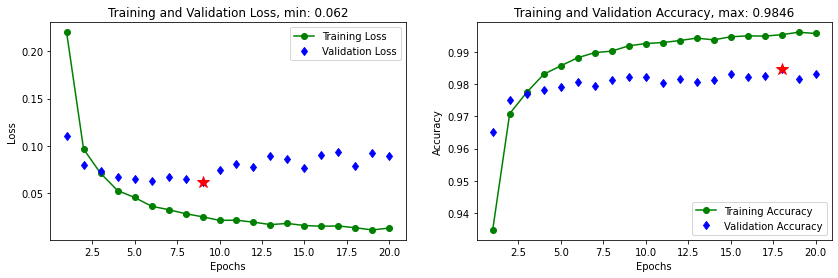

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape,y_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

